In [ ]:
import numpy as np

X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3],
    [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8],
    [8.1, -0.1], [2.5, 3.5], [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2],
    [6.0, -1.5], [3.5, -0.1], [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3],
    [5.8, 0.6]
])

u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])
centroids = np.array([u1, u2])

# calculating Euclidean distance
def euclid_distance(a, b):
    x = (a - b) ** 2
    y = np.sqrt(np.sum(x))
    return y

# K-Means implementation
def k_means(X, centroids, max_iters=100, tol=1e-4):
    k = len(centroids)
    prev_centroids = np.zeros_like(centroids)
    for iteration in range(max_iters):  # Renamed the outer loop variable to 'iteration'
        # (a) Assignment step
        clusters = {i: [] for i in range(k)}
        for x in X:
            distances = [euclid_distance(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(x)
        
        # Print clusters for current iteration
        print(f"Iteration {iteration + 1}:")
        for i in range(k):
            print(f"  Cluster {i + 1}: {np.array(clusters[i])}")

        # (b) Update step
        for i in range(k):
            if clusters[i]:  # Avoid empty clusters
                centroids[i] = np.mean(clusters[i], axis=0)

        print(f"  Updated Centroids: {centroids}")

        # (c) Convergence check
        shift = np.linalg.norm(centroids - prev_centroids)
        if shift < tol:
            print(f"Convergence reached at iteration {iteration + 1}")
            break
        prev_centroids = centroids.copy()

    return centroids, clusters

final_centroids, final_clusters = k_means(X, centroids)

print("\nFinal Centroids:")
print(final_centroids)
print("\nCluster Assignments:")
for cluster_idx, points in final_clusters.items():
    print(f"Cluster {cluster_idx + 1}: {np.array(points)}")


Iteration 1:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 6.1  0.5]
 [ 5.3  0.3]
 [ 5.8  0.6]]
  Cluster 2: [[ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.4 -0.5]]
  Updated Centroids: [[ 5.77058824  2.01764706]
 [ 4.0625     -0.1       ]]
Iteration 2:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 6.1  0.5]
 [ 5.8  0.6]]
  Cluster 2: [[ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.4 -0.5]
 [ 5.3  0.3]]
  Updated Centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Iteration 3:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]

In [17]:
from sklearn.metrics import silhouette_score

y_pred = np.zeros(X.shape[0])
for cluster_idx, points in final_clusters.items():
    for point in points:
        index = np.where(np.all(X == point, axis=1))[0][0]
        y_pred[index] = cluster_idx

score = silhouette_score(X, y_pred)
print(f"\nSilhouette Score: {score}")


Silhouette Score: 0.35428546415226975


Part-B

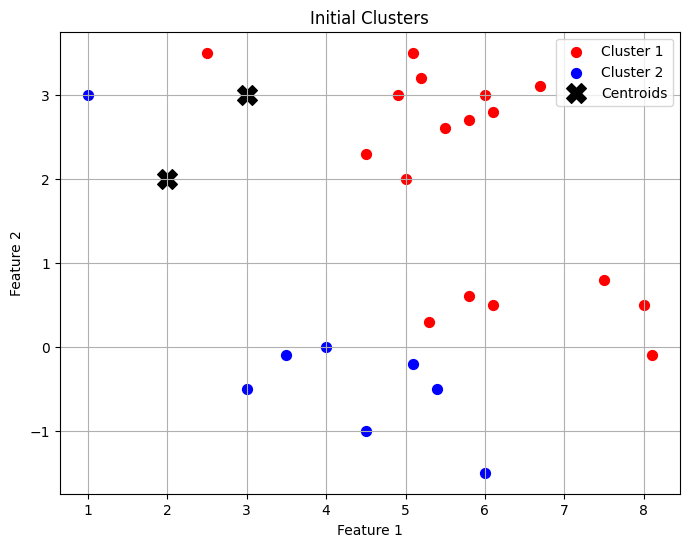

Iteration 1:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 6.1  0.5]
 [ 5.3  0.3]
 [ 5.8  0.6]]
  Cluster 2: [[ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.4 -0.5]]
  Updated Centroids: [[ 5.77058824  2.01764706]
 [ 4.0625     -0.1       ]]
Iteration 2:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 6.1  0.5]
 [ 5.8  0.6]]
  Cluster 2: [[ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.4 -0.5]
 [ 5.3  0.3]]
  Updated Centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Iteration 3:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]

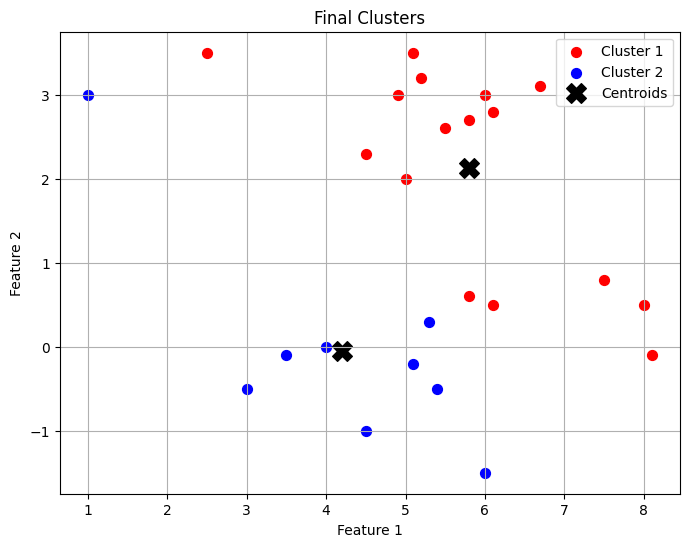

In [13]:
import matplotlib.pyplot as plt

u11 = np.array([3.0, 3.0])
u22 = np.array([2.0, 2.0])
centroids1 = np.array([u11, u22])

# Helper function to plot clusters
def plot_clusters(X, centroids, clusters, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
    plt.figure(figsize=(8, 6))

    # Plot points in each cluster
    for i, points in clusters.items():
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], s=50, color=colors[i], label=f'Cluster {i + 1}')
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Plot initial state
initial_clusters1 = {0: [], 1: []}
for x in X:
    distances1 = [euclid_distance(x, c) for c in centroids1]
    cluster_idx1 = np.argmin(distances1)
    initial_clusters1[cluster_idx1].append(x)

plot_clusters(X, centroids1, initial_clusters1, "Initial Clusters")

# Run K-Means
final_centroids1, final_clusters1 = k_means(X, centroids1)

# Plot final state
plot_clusters(X, final_centroids1, final_clusters1, "Final Clusters")


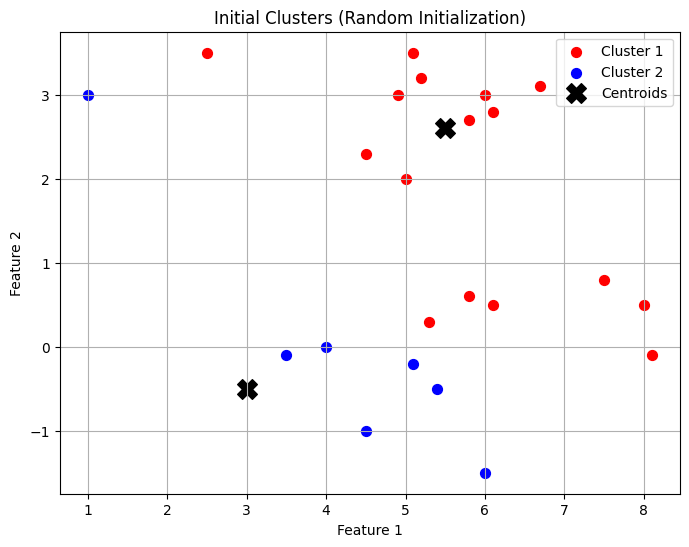

Iteration 1:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 6.1  0.5]
 [ 5.3  0.3]
 [ 5.8  0.6]]
  Cluster 2: [[ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.4 -0.5]]
  Updated Centroids: [[ 5.77058824  2.01764706]
 [ 4.0625     -0.1       ]]
Iteration 2:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 6.1  0.5]
 [ 5.8  0.6]]
  Cluster 2: [[ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.4 -0.5]
 [ 5.3  0.3]]
  Updated Centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Iteration 3:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]

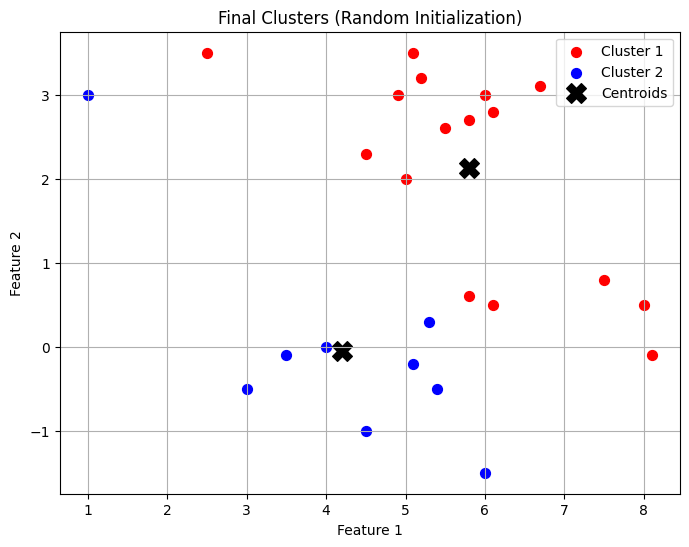

Centroids with provided initialization:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Centroids with random initialization:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [ ]:
# Random initialization of centroids
np.random.seed(42)  # For reproducibility
random_centroids = X[np.random.choice(X.shape[0], 2, replace=False)]

# Assign points to nearest centroids for initial random centroids
initial_random_clusters = {i: [] for i in range(len(random_centroids))}
for x in X:
    distances = [euclid_distance(x, c) for c in random_centroids]
    cluster_idx = np.argmin(distances)
    initial_random_clusters[cluster_idx].append(x)

# Plot initial clusters with random initialization
plot_clusters(X, random_centroids, initial_random_clusters, "Initial Clusters (Random Initialization)")

final_random_centroids, final_random_clusters = k_means(X, random_centroids)

plot_clusters(X, final_random_centroids, final_random_clusters, "Final Clusters (Random Initialization)")

print("Centroids with provided initialization:")
print(final_centroids)

print("\nCentroids with random initialization:")
print(final_random_centroids)


In [18]:
y_pred_random = np.zeros(X.shape[0])
for cluster_idx, points in initial_random_clusters.items():
    for point in points:
        index = np.where(np.all(X == point, axis=1))[0][0]
        y_pred_random[index] = cluster_idx

score1 = silhouette_score(X, y_pred_random)
print(f"\nSilhouette Score: {score1}")


Silhouette Score: 0.3417399864126757


In [19]:
y_pred_random1 = np.zeros(X.shape[0])
for cluster_idx, points in final_random_clusters.items():
    for point in points:
        index = np.where(np.all(X == point, axis=1))[0][0]
        y_pred_random1[index] = cluster_idx

score12 = silhouette_score(X, y_pred_random1)
print(f"\nSilhouette Score: {score12}")


Silhouette Score: 0.35428546415226975


-----------------------------------------------------
for k=1
Iteration 1:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 6.1  0.5]
 [ 5.4 -0.5]
 [ 5.3  0.3]
 [ 5.8  0.6]]
  Updated Centroids: [[5.224 1.34 ]]
Iteration 2:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 6.1  0.5]
 [ 5.4 -0.5]
 [ 5.3  0.3]
 [ 5.8  0.6]]
  Updated Centroids: [[5.224 1.34 ]]
Convergence reached at iteration 2
-----------------------------------------------------
for k=2
Iteration 1:
  Cluster 1: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7

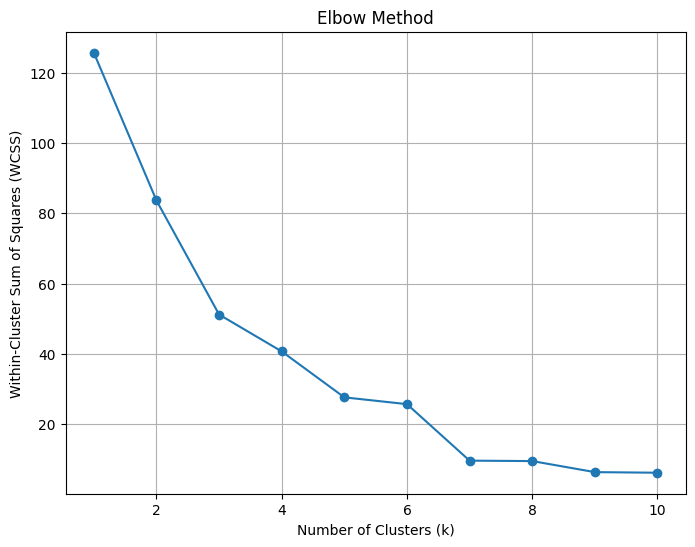

In [ ]:
def calculate_wcss(X, centroids, clusters):
    wcss = 0
    for i, points in clusters.items():
        points = np.array(points)
        wcss = wcss + np.sum((points - centroids[i]) ** 2)
    return wcss

def elbow_method(X, max_k=10):
    wcss_vals = []
    for k in range(1, max_k + 1):
        print("-----------------------------------------------------")
        print("for k=" + str(k))
        np.random.seed(42)  # Reproducibility
        initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        final_centroids, final_clusters = k_means(X, initial_centroids)
        wcss = calculate_wcss(X, final_centroids, final_clusters)
        wcss_vals.append(wcss)


    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), wcss_vals, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
    plt.grid()
    plt.show()

    return wcss_vals

# Determine optimal number of clusters
wcss_vals = elbow_method(X)




Iteration 1:
  Cluster 1: [[2.5 3.5]
 [1.  3. ]]
  Cluster 2: [[ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 6.  -1.5]
 [ 6.1  0.5]
 [ 5.4 -0.5]]
  Cluster 3: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.3  0.3]
 [ 5.8  0.6]]
  Updated Centroids: [[ 1.75        3.25      ]
 [ 6.85       -0.05      ]
 [ 5.05882353  1.60588235]]
Iteration 2:
  Cluster 1: [[2.5 3.5]
 [1.  3. ]]
  Cluster 2: [[ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 4.5 -1. ]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 6.1  0.5]
 [ 5.4 -0.5]
 [ 5.8  0.6]]
  Cluster 3: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 3.  -0.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 5.3  0.3]]
  Updated Centroids: [[ 1.75        3.25      ]
 [ 6.27777778 -0.1       ]
 [ 5.04285714  1.99285714]]
Iteration 3:
  Cluster 1: [[2.5 3.5]
 [1. 

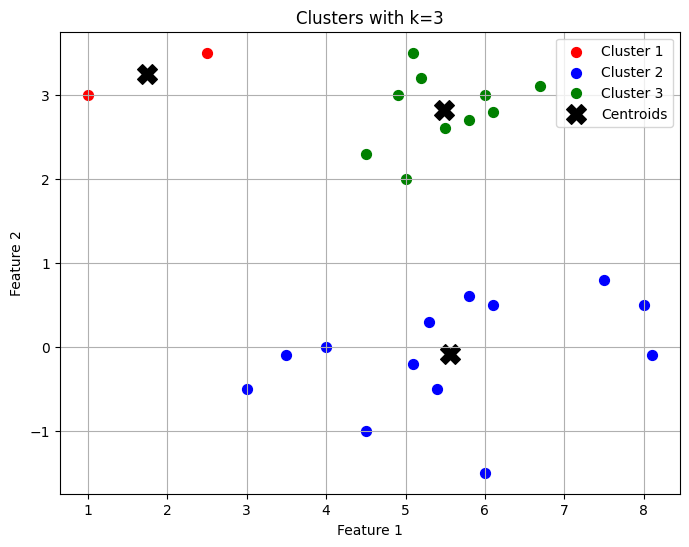

In [16]:
# Using the elbow point (k=optimal clusters), perform clustering
optimal_k = 3  
initial_centroids_optimal = X[np.random.choice(X.shape[0], optimal_k, replace=False)]
final_centroids_optimal, final_clusters_optimal = k_means(X, initial_centroids_optimal)

# Plot resulting clusters
plot_clusters(X, final_centroids_optimal, final_clusters_optimal, f"Clusters with k={optimal_k}")

In [20]:
y_pred = np.zeros(X.shape[0])
for cluster_idx, points in final_clusters_optimal.items():
    for point in points:
        index = np.where(np.all(X == point, axis=1))[0][0]
        y_pred[index] = cluster_idx

score = silhouette_score(X, y_pred)
print(f"\nSilhouette Score: {score}")


Silhouette Score: 0.4945359834656429
